In [2]:
# Install necessary libraries
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install folium
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Import warnings module to suppress warnings
import warnings

# Ignore warnings of the category FutureWarning
# FutureWarning is a category of warning that indicates that a certain feature or behavior will change in future versions of the library
warnings.simplefilter(action='ignore', category=FutureWarning)

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\kp\AppData\Local\Temp\ipykernel_12252\2399831991.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


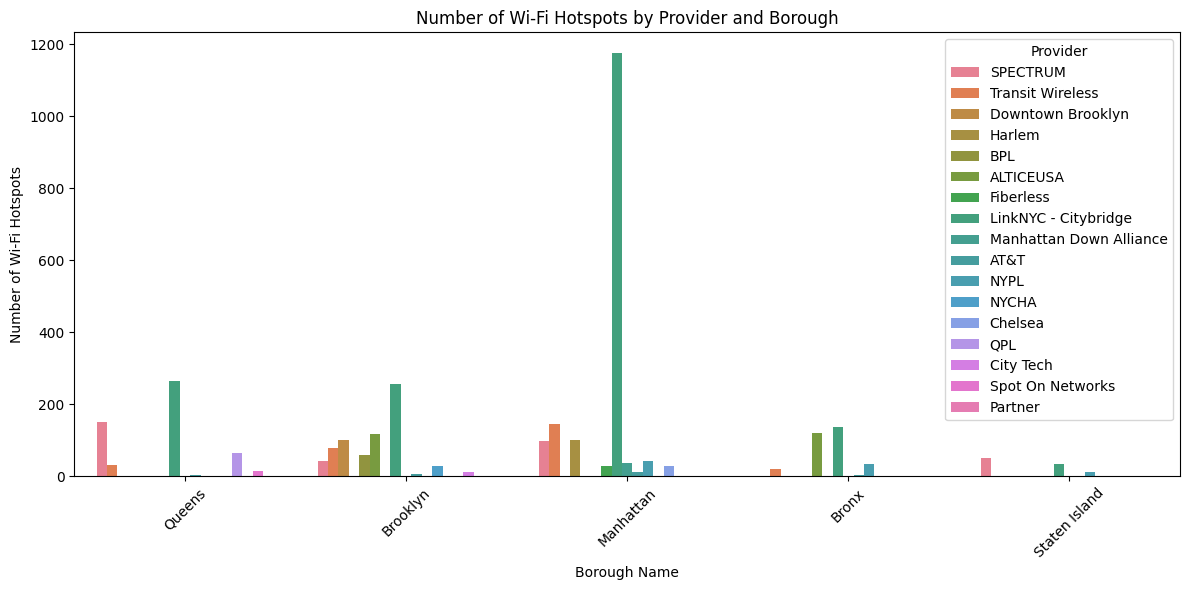

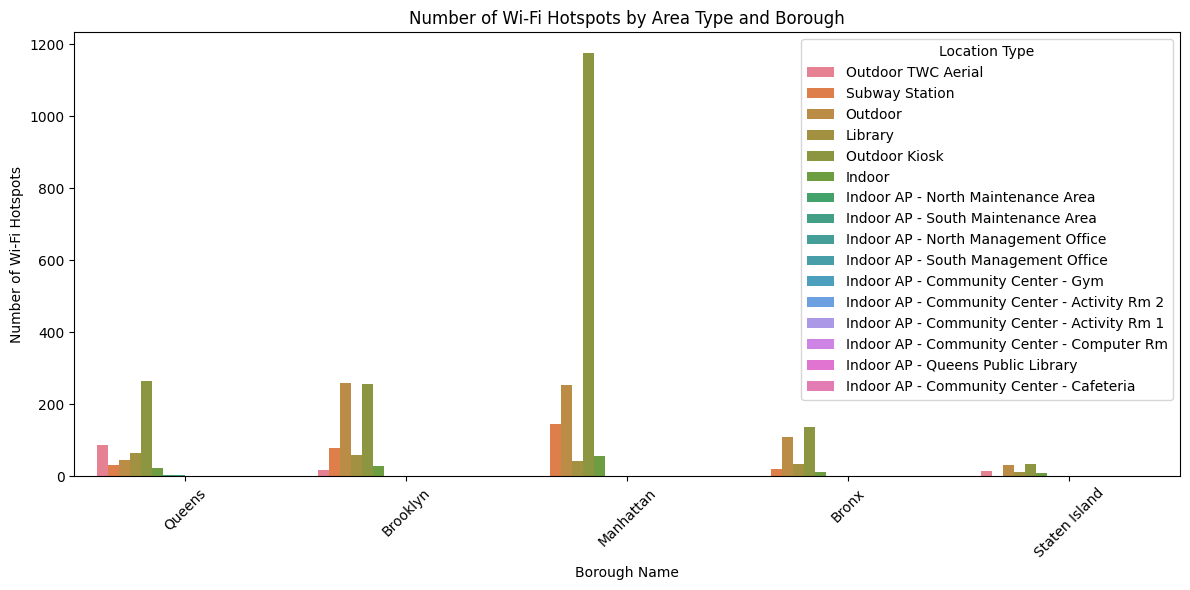

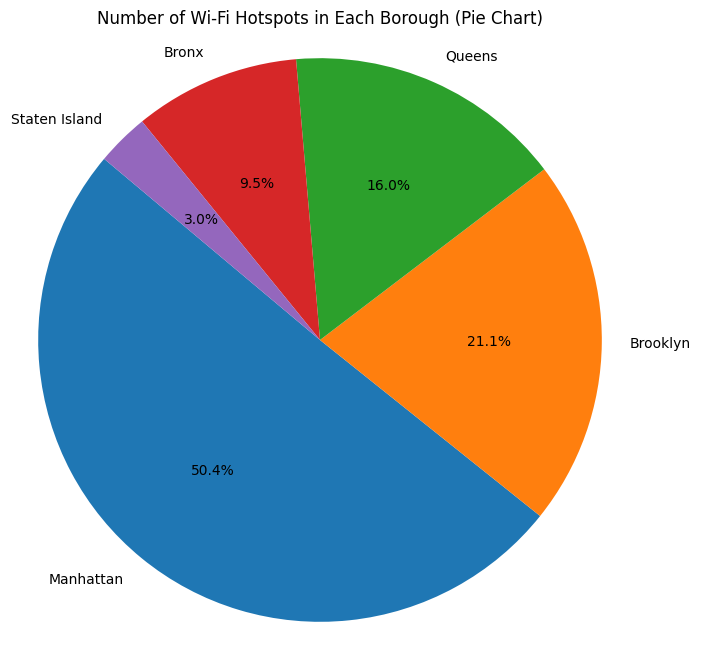

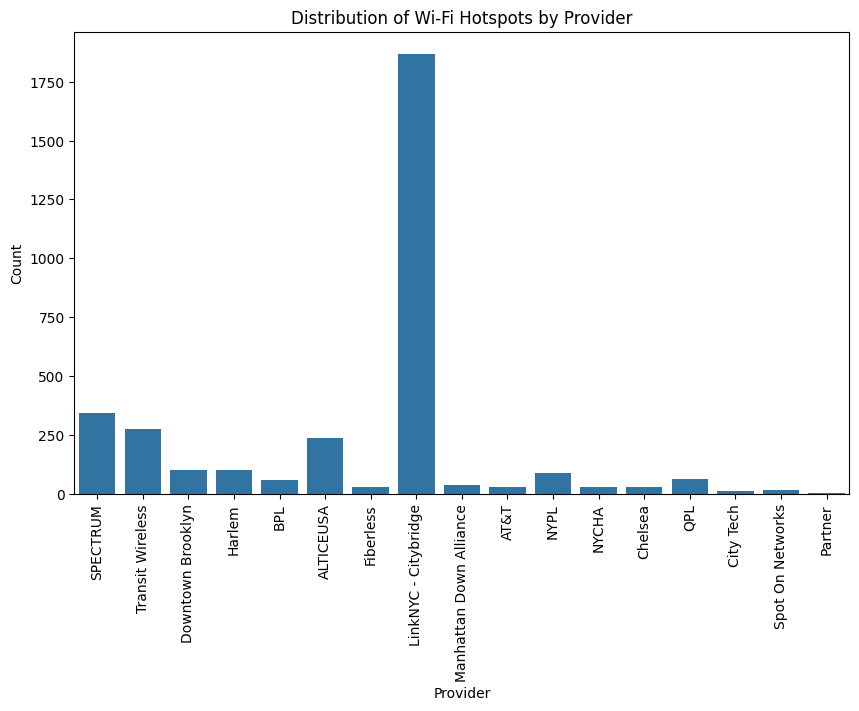

In [4]:

# Load the CSV file into a DataFrame
df = pd.read_csv("NYC_Wi-Fi_Hotspot_Locations_20240318.csv")

# Count the number of Wi-Fi hotspots in each Borough
borough_counts = df['Borough Name'].value_counts()


# 1. Provider vs. Borough (Clustered Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Borough Name', hue='Provider')
plt.title('Number of Wi-Fi Hotspots by Provider and Borough')
plt.xlabel('Borough Name')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.xticks(rotation=45)
plt.legend(title='Provider')
plt.tight_layout()
plt.show()

# 2. Area Type vs. Borough (Grouped Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Borough Name', hue='Location_T')
plt.title('Number of Wi-Fi Hotspots by Area Type and Borough')
plt.xlabel('Borough Name')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.xticks(rotation=45)
plt.legend(title='Location Type')
plt.tight_layout()
plt.show()

# 3 Plotting the number of Wi-Fi hotspots in each Borough using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Wi-Fi Hotspots in Each Borough (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# 4 Plotting the distribution of Wi-Fi hotspots by provider
plt.figure(figsize=(10, 6))
sns.countplot(x='Provider', data=df)
plt.title('Distribution of Wi-Fi Hotspots by Provider')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#5  the borough with the least number of Wi-Fi providers and their locations

# Create a Folium map centered around New York City
nyc_map_least_number = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Define a list of boroughs
boroughs = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

# Iterate over each borough
for borough in boroughs:
    # Filter data for the current borough
    filtered_df = df[df['Borough Name'] == borough]
    
    # If the filtered DataFrame is not empty
    if not filtered_df.empty:
        # Group data by provider and count unique Wi-Fi providers
        provider_counts = filtered_df['Provider'].value_counts()
        
        # Find the least common Wi-Fi provider
        least_common_provider = provider_counts.idxmin()
        
        # Filter data for the least common provider
        filtered_df = filtered_df[filtered_df['Provider'] == least_common_provider]
        
        # Add markers for each Wi-Fi hotspot location in the filtered DataFrame
        for index, row in filtered_df.iterrows():
            folium.Marker([row['Latitude'], row['Longitude']], popup=row['Provider']).add_to(nyc_map_least_number)

# Save the map as an HTML file
nyc_map_least_number.save("boroughs_least_wifi_providers_locations.html")

nyc_map_least_number
